In [51]:
%matplotlib inline

import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import preprocessing
from sklearn import utils


# Always make it pretty.
plt.style.use('ggplot')

# We get some interger -> float typecast warning from sklean below, this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')

import itertools


In [52]:
d = pd.read_csv('data/cleaned_data_together.csv')

In [53]:
def df_cleaner(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df

In [54]:
df = df_cleaner(d)

In [55]:
df['MOY'] =df['DateTime']
df['WOY'] =df['DateTime']
def moy(x):
    #test = df_shift_final['DateTime'][x]
    date = datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S")
    return date.month
df['MOY'] = df['MOY'].apply(lambda x : moy(x))

In [56]:
def woy(x):
    #test = df_shift_final['DateTime'][x]
    date = datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S")
    return int(date.strftime("%V"))
df['WOY'] = df['WOY'].apply(lambda x : woy(x))

In [57]:
df.head()

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,MOY,WOY
0,2010-01-01,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1,1,53
1,2010-01-02,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,2,1,53
2,2010-01-03,5.82,23.5537,2197157.0,3117.0,255035.0,1666520.0,3,1,53
3,2010-01-04,6.09,23.2831,2197157.0,3117.0,255035.0,1666520.0,4,1,1
4,2010-01-05,6.19,24.5469,2197157.0,3117.0,255035.0,1666520.0,5,1,1


In [58]:
doy = df.pop('DOY')

In [59]:
df.head()

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,MOY,WOY
0,2010-01-01,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1,53
1,2010-01-02,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,1,53
2,2010-01-03,5.82,23.5537,2197157.0,3117.0,255035.0,1666520.0,1,53
3,2010-01-04,6.09,23.2831,2197157.0,3117.0,255035.0,1666520.0,1,1
4,2010-01-05,6.19,24.5469,2197157.0,3117.0,255035.0,1666520.0,1,1


In [60]:
df = df.set_index('DateTime')

In [61]:
dfw =df.resample('W').median()

In [62]:
dfw['one_back'] = dfw['Henry Hub Price $/MMBtu'].shift(1).fillna(method= 'backfill')

In [ ]:
dfw['one_week_back_temp'] = dfw['Henry Hub Price $/MMBtu'].shift(1).fillna(method= 'backfill')
dfw['t_week_back_temp'] = dfw['Henry Hub Price $/MMBtu'].shift(1).fillna(method= 'backfill')
dfw['one_week_back_temp'] = dfw['Henry Hub Price $/MMBtu'].shift(1).fillna(method= 'backfill')
dfw['one_week_back_temp'] = dfw['Henry Hub Price $/MMBtu'].shift(1).fillna(method= 'backfill')

In [63]:
dfw

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,MOY,WOY,one_back
DateTime,,,,,,,,,
2010-01-03,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,1,53,5.82
2010-01-10,6.56,23.2831,2197157.0,3117.0,255035.0,1666520.0,1,1,5.82
2010-01-17,5.66,35.7195,2197157.0,2850.0,255035.0,1666520.0,1,2,6.56
2010-01-24,5.66,37.1215,2197157.0,2607.0,255035.0,1666520.0,1,3,5.66
2010-01-31,5.32,28.3624,2197157.0,2521.0,255035.0,1666520.0,1,4,5.66
2010-02-07,5.51,31.3111,2144157.0,2406.0,255035.0,1776171.0,2,5,5.32
2010-02-14,5.48,28.8482,2144157.0,2214.0,255035.0,1776171.0,2,6,5.51
2010-02-21,5.40,33.4098,2144157.0,2026.0,255035.0,1776171.0,2,7,5.48
2010-02-28,4.84,31.8510,2144157.0,1853.0,255035.0,1776171.0,2,8,5.40


In [64]:
y = dfw.pop('Henry Hub Price $/MMBtu').values

In [65]:
X = dfw.values

In [66]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], y[0:size], y[size:len(y)]

In [67]:
model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5, 8],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.474


In [68]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [69]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions2 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,8)))
    yhat = output[0]
    predictions2.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions2)
error = mean_squared_error(y_test, predictions2)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.09188


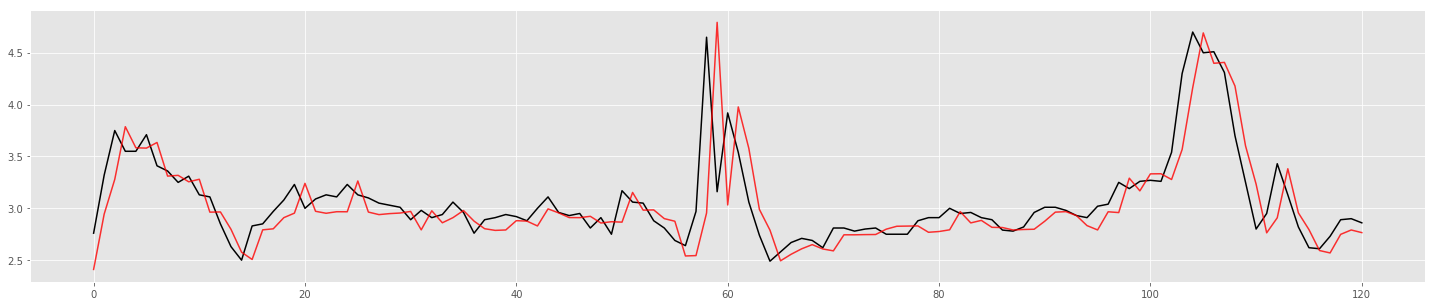

In [70]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions2, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

# Without the one week back feature

In [72]:
dfw.columns

Index(['Temp', 'Production MMCF', 'Storage BCFE', 'Reserves BCFE',
       'Consumption MMCF', 'MOY', 'WOY', 'one_back'],
      dtype='object')

In [73]:
nb = ['Temp', 'Production MMCF', 'Storage BCFE', 'Reserves BCFE',
       'Consumption MMCF', 'MOY', 'WOY']

In [74]:
X = dfw[nb].values

In [75]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], y[0:size], y[size:len(y)]

In [77]:
model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5, 7],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: -1.04


In [78]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [79]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions2 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,7)))
    yhat = output[0]
    predictions2.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions2)
error = mean_squared_error(y_test, predictions2)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.31595


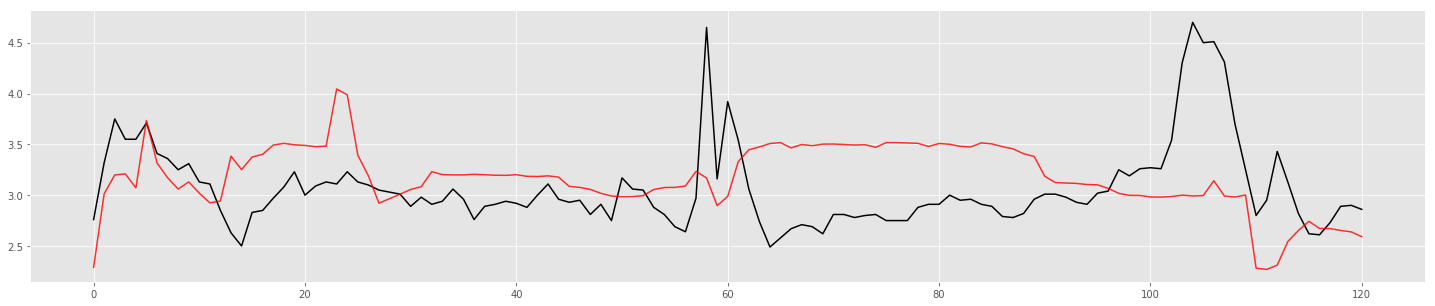

In [80]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions2, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()